# Считывание данных

In [62]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

X = data.data
y = data.target

In [63]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [64]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

# Понижение размерности

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_new = lda.fit_transform(X, y)

print(f"Исходные данные: {X.shape = }")
print(f"Данные после использования LDA: {X_new.shape = }")

Исходные данные: X.shape = (442, 10)
Данные после использования LDA: X_new.shape = (442, 1)


In [66]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [67]:
X_new

array([[ 1.66315006e+00],
       [-2.31198262e+00],
       [ 7.50925129e-01],
       [ 4.25009179e-01],
       [-7.60775288e-01],
       [-7.10156564e-01],
       [-1.73188851e+00],
       [-1.29240797e+00],
       [ 2.45281480e-01],
       [ 2.12783063e+00],
       [-8.40507780e-01],
       [-1.83919208e+00],
       [-9.89330926e-01],
       [ 5.33336858e-01],
       [-1.45889495e+00],
       [ 2.32241071e-01],
       [ 1.58416674e+00],
       [ 7.21009335e-01],
       [-1.43094029e-02],
       [-5.64549073e-01],
       [-5.99725930e-01],
       [-1.50636825e+00],
       [-8.95827753e-01],
       [ 3.10011654e+00],
       [ 3.97307559e-01],
       [ 1.25371987e-01],
       [-1.02649670e+00],
       [ 7.82895070e-01],
       [-2.80784465e-01],
       [ 1.27090349e+00],
       [ 3.12226223e-01],
       [-1.87559825e+00],
       [ 2.29554546e+00],
       [-1.22378892e+00],
       [-1.76544159e+00],
       [-1.86713447e+00],
       [ 1.75156457e+00],
       [ 3.29554777e-01],
       [ 2.1

# Разделение на обучающую и тестовую выборки

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, train_size=0.7)

# Реализация класса MyLinearRegression

In [84]:
import numpy as np


class MyLinearRegression:
    def __init__(self, fit_intercept=True):
        """
        Parameters
        ----------
        fit_intercept: нужно ли добавлять фиктивный единичный признак или нет
        """
        self.fit_intercept = fit_intercept

    def fit(self, X, y):
        """
        Метод вычисляет веса

        Parameters
        ----------
        X: матрица признаков
        y: вектор целевых переменных
        """
        if self.fit_intercept:
            X = self._change_X_shape(X)

        self.w = np.linalg.inv(X.T @ X) @ X.T @ y

        return self

    def predict(self, X):
        """

        Parameters
        ----------
        X: матрица признаков

        Returns
        -------
        Вектор вредсказанных значений целевой переменной
        """
        if self.fit_intercept:
            X = self._change_X_shape(X)

        y_pred = X @ self.w

        return y_pred

    def get_weights(self):
        """
        Получение весов модели
        Returns
        -------

        """
        return self.w

    def _change_X_shape(self, X):
        """
        Метод добавляет фиктивный единичный признак к матрице признаков X
        Parameters
        ----------
        X: матрица признаков

        Returns
        -------
        Новая матрица признаков с фиктивным признаком
        """
        return np.hstack((X, np.ones((X.shape[0], 1))))

# Использование собственного класса LinearRegression

In [99]:
X_train.shape

(309, 1)

In [100]:
y_train.shape

(309,)

In [101]:
clf = MyLinearRegression()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
weight = clf.get_weights()
weight

array([ 38.29876028, 155.94742373])

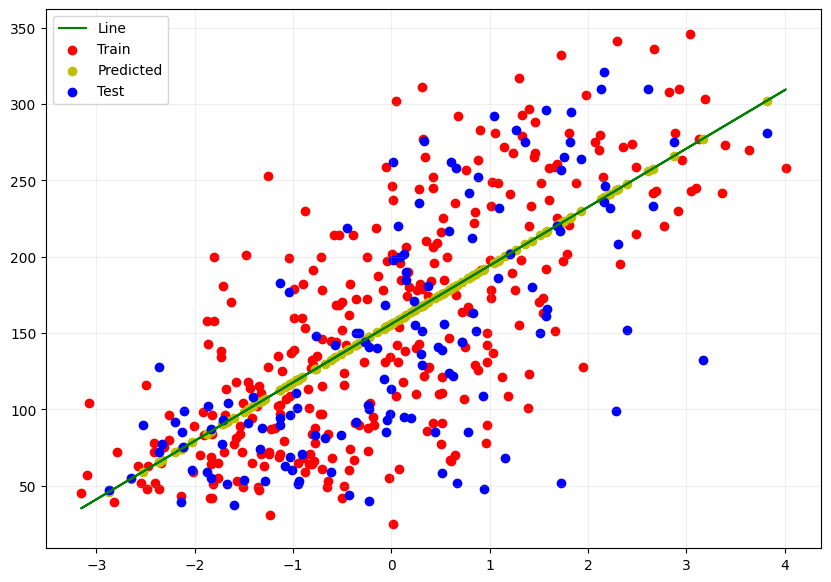

In [106]:
import matplotlib.pyplot as plt


def linear_expr(x):
    return weight[0] * x + weight[1]


plt.figure(figsize=(10, 7))
plt.plot(X_train, linear_expr(X_train), label='Line', c='g')
plt.scatter(X_train, y_train, label='Train', c='r')
plt.scatter(X_test, y_pred, label='Predicted', c='y')
plt.scatter(X_test, y_test, label='Test', c='b')

plt.grid(alpha=0.2)
plt.legend()
plt.show()

# Использование LinearRegression из sklearn

# Сравнение результатов

In [40]:
X_train

array([[-0.05273755, -0.04464164,  0.07139652, ..., -0.02141183,
        -0.04688253,  0.00306441],
       [-0.04183994, -0.04464164, -0.03315126, ..., -0.02473293,
        -0.02595311, -0.03835666],
       [-0.0854304 , -0.04464164, -0.00405033, ..., -0.03949338,
        -0.0611758 , -0.01350402],
       ...,
       [-0.06363517,  0.05068012, -0.07949718, ..., -0.03949338,
        -0.01811369, -0.05492509],
       [ 0.03081083, -0.04464164,  0.00564998, ...,  0.1081111 ,
         0.06605067,  0.01963284],
       [-0.00188202, -0.04464164, -0.06979687, ..., -0.03949338,
        -0.06291688,  0.04034337]])

In [42]:
X_train[:, np.newaxis].shape

(309, 1, 10)